<a href="https://colab.research.google.com/github/spiegel-jpg/Denial_of_Service-8240/blob/main/CSCI8240RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from scipy.stats import norm
import statistics
import pywt
from google.colab import drive
import pandas as pd
import plotly.express as px

In [30]:
drive.mount('/content/drive') # Mounting the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
proj_dir = '/content/drive/MyDrive/spiegel'

In [32]:
data = pd.read_excel(proj_dir+'/get.xlsx') # Reading the data

In [6]:
data['Time'] = data['Time'].dt.floor('h')
timeseries = data.set_index('Time')

In [7]:
H = 10634                          # Total hours of data we have
pages = pd.read_csv(proj_dir+'/pages.csv')
valid_page = pages['PATH']

In [31]:
pages = pd.read_csv(proj_dir+'/pages.csv')
valid_page = pages['PATH']

# Creating quantiles with 114 pages each.

quantile1 = list(valid_page[0:114])
quantile2 = list(valid_page[114:228])
quantile3 = list(valid_page[228:342])
quantile4 = list(valid_page[342:456])
quantile5 = list(valid_page[456:570])

In [9]:
valid_page_checker = set(valid_page)
N = len(pages)                      # N is the total pages on the website
                                    # These are all the pages which are services with 200 HTML status code
M = int(5)
no_of_quantiles = int(N/M)

#  fij represent the total number of requests on ith page (1 ≤ i ≤ N) in the jth hour.


In [10]:
# U is the quantiles 
# timeseries.index[i]
time=set()
for i in range(len(timeseries)):
  time.add(timeseries.index[i])
time = list(sorted(time))
# print(time)
# U = [[0 for i in range(M)] for j in range(int(no_of_quantiles))]
# for i in range(int(no_of_quantiles)):
#   for j in range(M):
#     U[i][j]


In [11]:
S = [[0 for i in range(int(H))] for j in range(int(M))] 

In [12]:
for i in range(H):
  requests = timeseries.loc[time[i]]
  no_of_req = int(len(requests))
  request_path = requests['Path']
  request_response = requests['Response']
  if not isinstance(requests, pd.DataFrame):
    if request_response == 200:
        if request_path in quantile1:
          S[0][i]+=1
        elif request_path in quantile2:
          S[1][i]+=1
        elif request_path in quantile3:
          S[2][i]+=1
        elif request_path in quantile4:
          S[3][i]+=1
        elif request_path in quantile5:
          S[4][i]+=1
  else:
    for j in range(no_of_req):
      if request_response[j] == 200:
        if request_path[j] in quantile1:
          S[0][i]+=1
        elif request_path[j] in quantile2:
          S[1][i]+=1
        elif request_path[j] in quantile3:
          S[2][i]+=1
        elif request_path[j] in quantile4:
          S[3][i]+=1
        elif request_path[j] in quantile5:
          S[4][i]+=1

Text(0, 0.5, 'No of requests')

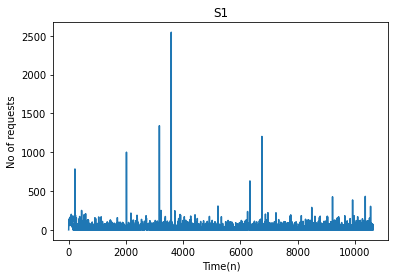

In [13]:
x = np.arange(0, H, 1)
plt.plot(x,S[0])
plt.title("S1")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

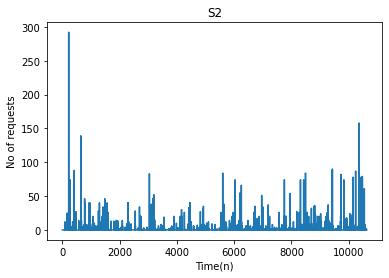

In [14]:
x = np.arange(0, H, 1)
plt.plot(x,S[1])
plt.title("S2")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

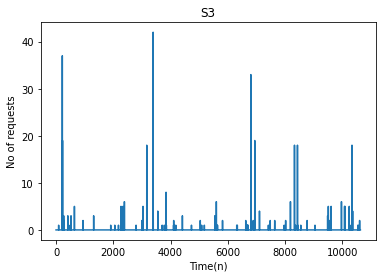

In [15]:
x = np.arange(0, H, 1)
plt.plot(x,S[2])
plt.title("S3")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

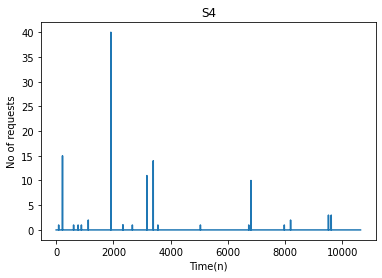

In [16]:
x = np.arange(0, H, 1)
plt.plot(x,S[3])
plt.title("S4")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

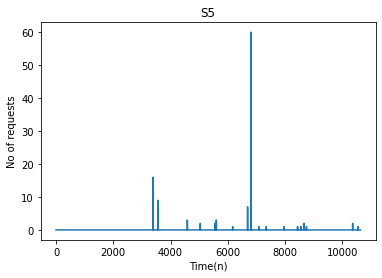

In [17]:
x = np.arange(0, H, 1)
plt.plot(x,S[4])
plt.title("S5")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

For Noise


Rtotal is the total number of requests for H/2 h. Hence, Rtotal is 129616 requests.

In [18]:
R_total_no = int(H/2)
noise1 = S[0][0:R_total_no]
noise2 = S[1][0:R_total_no]
noise3 = S[2][0:R_total_no]
noise4 = S[3][0:R_total_no]
noise5 = S[4][0:R_total_no]
noise = noise1+noise2+noise3+noise4+noise5

In [33]:
# Getting the Mean 
noise1_mean = np.mean(noise1)
noise2_mean = np.mean(noise2)
noise3_mean = np.mean(noise3)
noise4_mean = np.mean(noise4)
noise5_mean = np.mean(noise5)
# Getting the Variance
noise1_var = np.var(noise1)
noise2_var = np.var(noise2)
noise3_var = np.var(noise3)
noise4_var = np.var(noise4)
noise5_var = np.var(noise5)
# Getting mean and variance for all quantiles
noise_mean = np.mean(noise)
noise_var = np.var(noise)

print(noise_mean, noise_var)

3.81572315215347 734.2518799218508


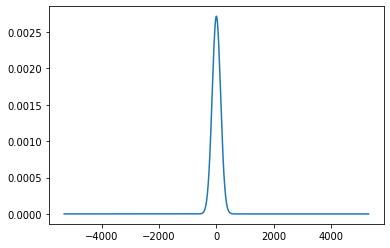

In [20]:
# Normal distribution for one of the quantiles according to the formula in the paper.
x = np.arange(-R_total_no, R_total_no, 1)
p=0.2 # 0.03 0.05 0.1 0.15 0.2
plt.plot(x,norm.pdf(x,p*noise_mean,p*noise_var))

In [ ]:
# Noise
data = np.random.randint(low=0,high=500,size=(4254),dtype='int')
plt.plot(np.arange(0,4254,1),S[4][5317:9571]+np.random.normal(noise_mean*p, noise_var*p, 4254)/5)

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[0])

In [23]:
data = np.random.randint(low=0,high=noise1_mean,size=(4254),dtype='int')
# plt.plot(np.arange(5317,9571,1),S[0][5317:9571]+data)
S0_mod = data + S[0][5317:9571]

In [24]:
# Quantile 1 with added noise
S0=[]
for i in range(H):
  if i<5317:
    S0.append(S[0][i])
  elif i>5316 and i<9570:
    S0.append(S0_mod[i-5317])
  elif i>9569:
    S0.append(S[0][i])
df = pd.DataFrame(dict(
    x = np.arange(0,H,1),
    y = S0
))
fig = px.line(df, x="x", y="y", title="Quantile 1 With added noise") 
fig.add_vrect(x0=5316, x1=9570)
fig.show(0)
# plt.plot(np.arange(0,H,1), S0)


In [25]:
# Quantile 1 without noise
df = pd.DataFrame(dict(
    x = np.arange(0,H,1),
    y = S[0]
))
fig = px.line(df, x="x", y="y", title="Quantile 1 Without noise") 
fig.add_vrect(x0=5316, x1=9570)
fig.show(0)

In [34]:
quantile5_req_noise = [0,1]
noise5_data = choice(quantile5_req_noise, 4254, p=[0.9,0.1]) # noise
data = np.random.randint(low=0,high=2,size=(4254),dtype='int')
# plt.plot(np.arange(5317,9571,1),S[0][5317:9571]+data)
S0_mod = noise5_data + S[4][5317:9571]
S0=[]
for i in range(H):
  if i<5317:
    S0.append(S[4][i])
  elif i>5316 and i<9570:
    S0.append(S0_mod[i-5317])
  elif i>9569:
    S0.append(S[4][i])
df = pd.DataFrame(dict(
    x = np.arange(0,H,1),
    y = S0
))
fig = px.line(df, x="x", y="y", title="Quantile 5 With added noise") 
fig.add_vrect(x0=5316, x1=9570)
fig.show(0)

In [35]:
df = pd.DataFrame(dict(
    x = np.arange(0,H,1),
    y = S[4]
))
fig = px.line(df, x="x", y="y", title="Quantile 5 without noise") 
fig.add_vrect(x0=5316, x1=9570)
fig.show(0)

In [37]:
print("Darpan The Dirbuster")

Darpan The Dirbuster
